## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
USER_PWD=Sys.getenv("PWD");
#.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
.libPaths( c( .libPaths(), paste0(USER_PWD, "/../../R") )); # suitable path to where MetENP R package is installed
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions
#### Complete information for this study is at Metabolomics Workbench: https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&StudyID=ST002104&StudyType=MS&ResultType=1

In [3]:
data = getmwstudies('ST002104', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,Blank_1,Blank_2,Blank_3,CaOV3_CBPR_1,CaOV3_CBPR_2,⋯,OVCAR5_CBPR_2,OVCAR5_CBPR_3,OVCAR5_Parent_1,OVCAR5_Parent_2,OVCAR5_Parent_3,QC_ov_1,QC_ov_2,QC_ov_3,RPMI_IST_1,RPMI_IST_2
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN003439,HILIC PO....,"1-(1,2,3....",ME512084,,NA,NA,NA,2040994.704,908558.7435,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,613063.9009
AN003439,HILIC PO....,"1,2-dioc....",ME512132,,NA,NA,NA,247767605.3,197476496,⋯,219858576.2,194936762.3,215032366.6,180065485,182129360.8,203328444.9,206671903.6,204920907.8,460966579.1,464603452.5
AN003439,HILIC PO....,"1,2-dioc....",ME512227,,NA,NA,NA,5984735.398,7834642.48,⋯,NA,NA,NA,NA,NA,3048388.518,2919540.329,3750944.071,NA,NA
AN003439,HILIC PO....,"1,6,8-tr....",ME512211,,NA,NA,NA,6820335.17,4528481.878,⋯,8879710.638,7401800.824,7199606.215,7960138.608,8351746.738,5915938.292,5770670.06,5868425.955,17853602.3,18507224.89
AN003439,HILIC PO....,"1,8-Diaz....",ME512035,"1,8-Diaz....",238574296.3,234768082.9,232654369.6,438639181.6,445149881.3,⋯,452197909.4,484637707.7,548265200.2,654666581.3,502263933.8,364443001.3,353674897.2,412123903.3,793320036.5,724175882.5
AN003439,HILIC PO....,1-Isothi....,ME512232,,NA,NA,NA,7587860.216,4590745.059,⋯,11674279.89,9933047.476,9549656.38,10838169.51,9591927.942,7904657.924,6810589.384,6033994.934,19445185.99,17436647.73


In [4]:
metadata = getmwstudies('ST002104', 'factors')
head(metadata)

,study_id,local_sample_id,sample_source,factors,mb_sample_id,raw_data,conditions
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_CBPR_1,CaOV3 cell line
2,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_CBPR_2,CaOV3 cell line
3,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_CBPR_3,CaOV3 cell line
4,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_Pa....,CaOV3 cell line
5,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_Pa....,CaOV3 cell line
6,ST002104,CaOV3_Pa....,Cultured....,conditio....,SA201530,CaOV3_Pa....,CaOV3 cell line


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,Blank_1,Blank_2,Blank_3,CaOV3_CBPR_1,CaOV3_CBPR_2,⋯,OVCAR5_Parent_3,QC_ov_1,QC_ov_2,QC_ov_3,RPMI_IST_1,RPMI_IST_2,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"(2R,4S)-2,4-Diaminopentanoate",AN003440,HILIC NE....,ME512389,,NA,NA,NA,2367294.971,1799531.26,⋯,3032364.262,2072851.056,2078779.032,2106789.34,6151951.885,6004909.189,NA,NA,NA,NA
2,"(5'-(but-3-en-1-yn-1-yl)-[2,2'-bithiophen]-5-yl)methyl acetate",AN003439,HILIC PO....,ME512302,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,2346520.415,2217924.894,NA,NA,NA,NA
3,"(R) 2,3-Dihydroxy-3-methylvalerate",AN003440,HILIC NE....,ME512406,,NA,NA,NA,3013749.68,1902726.207,⋯,465574.7655,988956.0494,1106827.975,952565.6301,564549.5249,516773.932,NA,NA,NA,NA
4,"{4-[3-(5-hydroxy-2,2-dimethyl-2H-chromen-6-yl)prop-2-enoyl]phenyl}oxidanesulfonic acid",AN003439,HILIC PO....,ME512282,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6198262.064,6045773.133,NA,NA,NA,NA
5,"1-(1,2,3,4,5-Pentahydroxypent-1-yl)-1,2,3,4-tetrahydro-beta-carboline-3-carboxylate",AN003439,HILIC PO....,ME512084,,NA,NA,NA,2040994.704,908558.7435,⋯,NA,NA,NA,NA,NA,613063.9009,NA,NA,NA,NA
6,1-carboxymethylpyridinium,AN003440,HILIC NE....,ME512417,,NA,NA,NA,NA,NA,⋯,NA,153291.0913,NA,219825.1391,3867875.846,3842554.174,NA,NA,NA,NA


In [6]:
unique(metadata$factors)


[[1]]
[1] "conditions:CaOV3 cell line"

[[2]]
[1] "conditions:CaOV3 cell line CBPR mutation"

[[3]]
[1] "conditions:culture media for CaOV3"

[[4]]
[1] "conditions:culture media for OVCAR5"

[[5]]
[1] "conditions:Extraction blank"

[[6]]
[1] "conditions:OVCAR5_cell line"

[[7]]
[1] "conditions:OVCAR5 cell line CBPR mutation"

[[8]]
[1] "conditions:pooled QC"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "HILIC POSITIVE ION MODE"

[[2]]
[1] "HILIC NEGATIVE ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c("HILIC NEGATIVE ION MODE"), metadata=metadata, factor1='CaOV3 cell line', factor2=c('CaOV3 cell line CBPR mutation'), factor_col='conditions',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


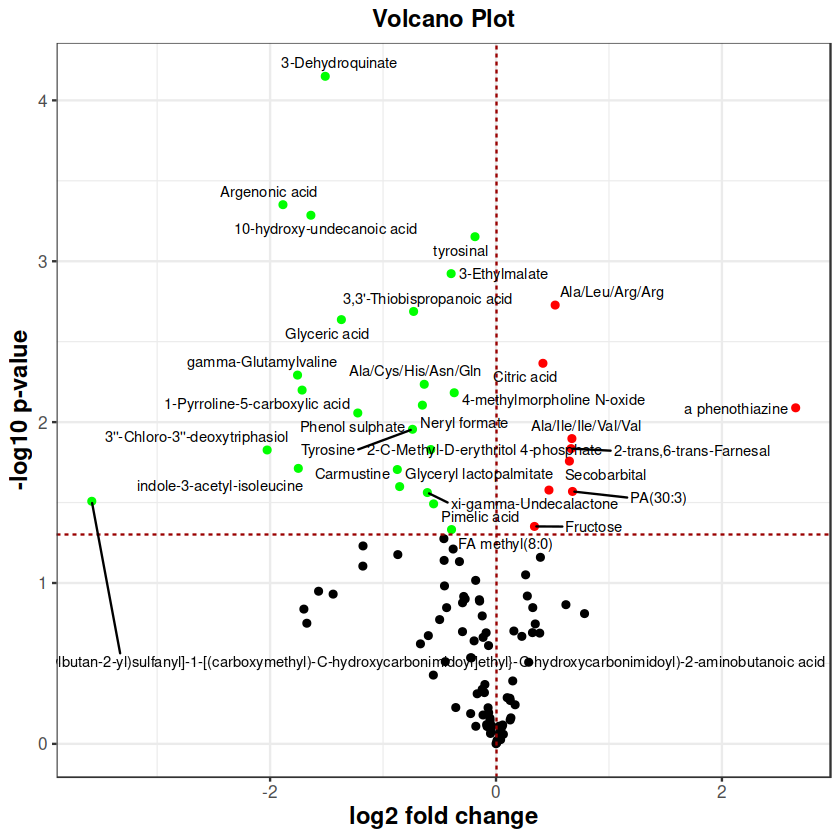

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

[1] ""

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0, updown_fillcolor=c("red", "green"))
print(count_changes$sig_met_count)

            sub_class No.of_metabolites                 color
1     C15 isoprenoids                 1 increased metabolites
2                  PA                 1 increased metabolites
3         Pyrimidones                 1 increased metabolites
4         Amino acids                -1 decreased metabolites
5  Dicarboxylic acids                -2 decreased metabolites
6          Dipeptides                -1 decreased metabolites
7      Fatty lactones                -1 decreased metabolites
8      Phenolic acids                -2 decreased metabolites
9          Pyrrolines                -1 decreased metabolites
10        Sugar acids                -1 decreased metabolites
11              Ureas                -1 decreased metabolites


Warning message:
“Use of `count_changes[[metclass]]` is discouraged.
ℹ Use `.data[[metclass]]` instead.”


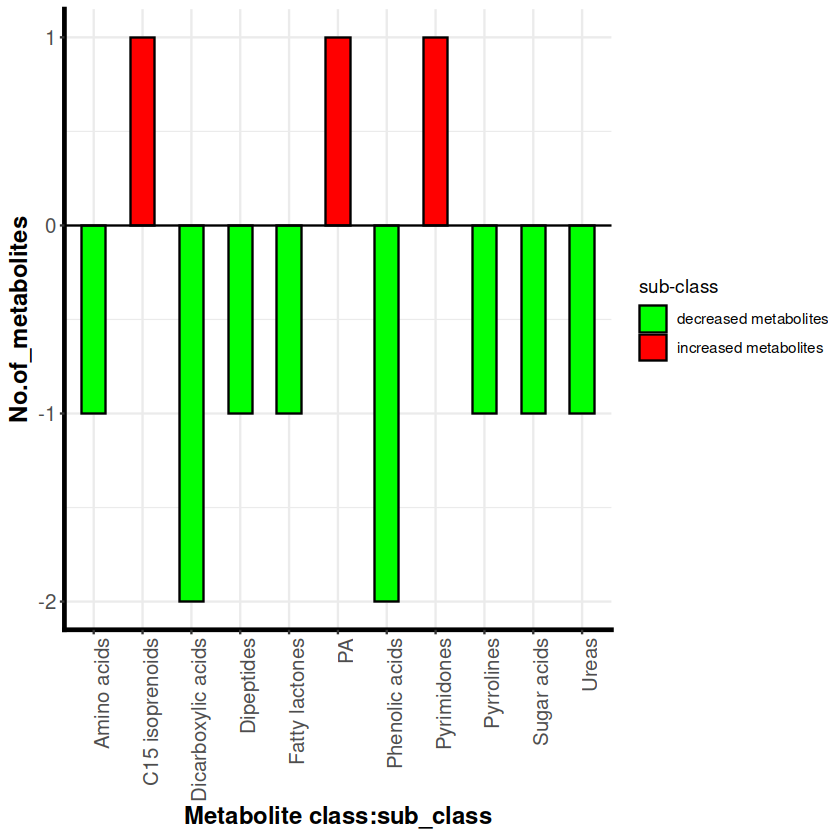

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
# pass debug = 0 below or comment some lines to suppress some print output
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1, debug = 1)
print(head(metenrichment))
#knitr::kable(head(metenrichment))
metenrichment[metenrichment$main_class %in% c("Ceramides", "Sphingomyelins"), c("Metabolite", "pval", "super_class", "main_class", "sub_class", "HG p-value")]
colnames(metenrichment)
metenrichment$super_class
metenrichment$main_class
metenrichment$sub_class

[1] "Name = (2-trans,6-trans)-Farnesal"
[1] "M = 1"                  "L = 13"                 "N = 425"               
[4] "k = 141"                "pp = 0.995174817743443"
[1] "Name = 1-Pyrroline-5-carboxylic acid"
[1] "M = 1"                  "L = 13"                 "N = 425"               
[4] "k = 139"                "pp = 0.994703450149052"
[1] "Name = 3-Dehydroquinate"
[1] "M = 2"                  "L = 13"                 "N = 425"               
[4] "k = 141"                "pp = 0.962658056433628"
[1] "Name = 3,3'-Thiobispropanoic acid"
[1] "M = 2"                  "L = 13"                 "N = 425"               
[4] "k = 141"                "pp = 0.962658056433628"
[1] "Name = Carmustine"
[1] "M = 1"                  "L = 13"                 "N = 425"               
[4] "k = 139"                "pp = 0.994703450149052"
[1] "Name = gamma-Glutamylvaline"
[1] "M = 1"                  "L = 13"                 "N = 425"               
[4] "k = 146"                "pp = 0.99618910

Metabolite,pval,super_class,main_class,sub_class,HG p-value
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>


[1] "refmet_name"                        "Exact mass"                        
 [3] "KEGG ID"                            "Metabolite"                        
 [5] "CaOV3 cell line_mean"               "CaOV3 cell line CBPR mutation_mean"
 [7] "Fold_change"                        "log2Fold_change"                   
 [9] "t_value"                            "pval"                              
[11] "padj"                               "metabolite_id"                     
[13] "super_class"                        "main_class"                        
[15] "sub_class"                          "formula"                           
[17] "HG p-value"

[1] "Prenol Lipids"                "Organoheterocyclic compounds"
 [3] "Polyketides"                  "Fatty Acyls"                 
 [5] "Organic acids"                "Organic acids"               
 [7] "Fatty Acyls"                  "Carbohydrates"               
 [9] "Glycerophospholipids"         "Polyketides"                 
[11] "Fatty Acyls"                  "Nucleic acids"               
[13] "Organic acids"

[1] "Isoprenoids"              "Pyrrolines"              
 [3] "Phenolic acids"           "Fatty acids"             
 [5] "Organic carbonic acids"   "Amino acids and peptides"
 [7] "Fatty esters"             "Monosaccharides"         
 [9] "Glycerophosphates"        "Phenolic acids"          
[11] "Fatty acids"              "Pyrimidines"             
[13] "Amino acids and peptides"

[1] "C15 isoprenoids"    "Pyrrolines"         "Phenolic acids"    
 [4] "Dicarboxylic acids" "Ureas"              "Dipeptides"        
 [7] "Fatty lactones"     "Sugar acids"        "PA"                
[10] "Phenolic acids"     "Dicarboxylic acids" "Pyrimidones"       
[13] "Amino acids"

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged.
ℹ Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged.
ℹ Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged.
ℹ Use `.data[[enrich_stats]]` instead.”


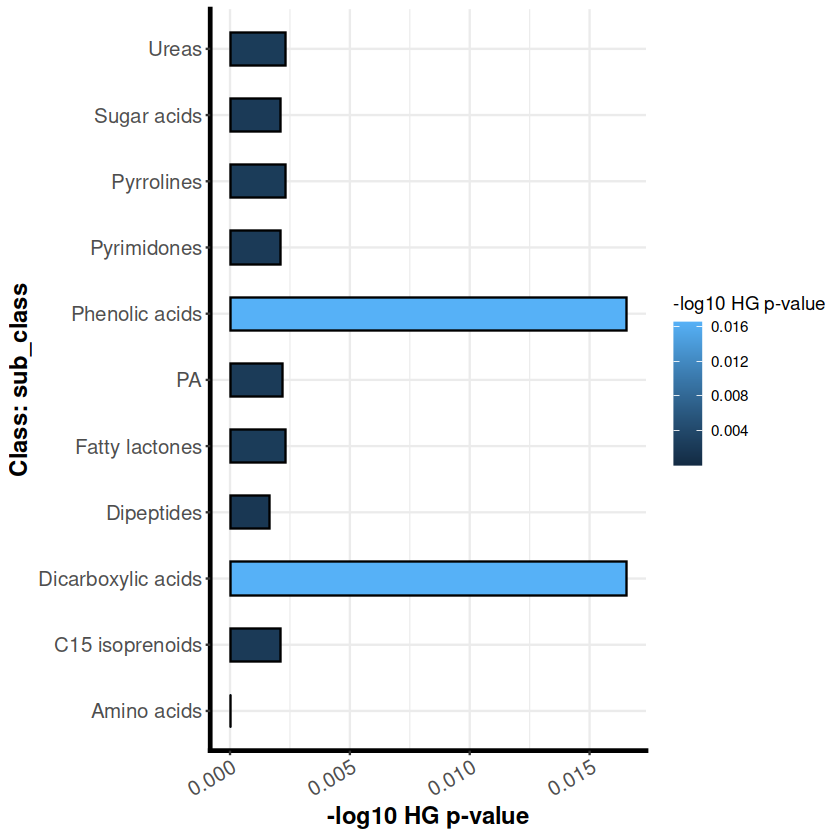

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,CaOV3 cell line_mean,CaOV3 cell line CBPR mutation_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00031,Tyrosine,181.0739,C00082,Tyrosine,168438227,100900638,0.5990365,-0.7392843,7.821843,⋯,ME512319,Organic acids,Amino acids and peptides,Amino acids,C9H11NO3,0.9999722,"1,2-benz....",Tyrosine metabolism,rn00350,hsa00350
2,R00031,Tyrosine,181.0739,C00082,Tyrosine,168438227,100900638,0.5990365,-0.7392843,7.821843,⋯,ME512319,Organic acids,Amino acids and peptides,Amino acids,C9H11NO3,0.9999722,"1,2-benz....",Metabolic pathways,rn01100,hsa01100
3,R00707,1-Pyrroline-5-carboxylic acid,113.0477,C03912,1-Pyrroline-5-carboxylic acid,9953469,3028344,0.3042501,-1.7166703,5.352726,⋯,ME512362,Organoheterocyclic compounds,Pyrrolines,Pyrrolines,C5H7NO2,0.9947035,(S)-1-py....,"Alanine, aspartate and glutamate metabolism",rn00250,hsa00250
4,R00708,1-Pyrroline-5-carboxylic acid,113.0477,C03912,1-Pyrroline-5-carboxylic acid,9953469,3028344,0.3042501,-1.7166703,5.352726,⋯,ME512362,Organoheterocyclic compounds,Pyrrolines,Pyrrolines,C5H7NO2,0.9947035,(S)-1-py....,"Alanine, aspartate and glutamate metabolism",rn00250,hsa00250
5,R00728,Tyrosine,181.0739,C00082,Tyrosine,168438227,100900638,0.5990365,-0.7392843,7.821843,⋯,ME512319,Organic acids,Amino acids and peptides,Amino acids,C9H11NO3,0.9999722,L-tyrosi....,Tyrosine metabolism,rn00350,hsa00350
6,R00729,Tyrosine,181.0739,C00082,Tyrosine,168438227,100900638,0.5990365,-0.7392843,7.821843,⋯,ME512319,Organic acids,Amino acids and peptides,Amino acids,C9H11NO3,0.9999722,L-tyrosi....,Tyrosine metabolism,rn00350,hsa00350


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "3,3'-Thiobispropanoic acid" "Carmustine"                
[3] "gamma-Glutamylvaline"       "xi-gamma-Undecalactone"    
[5] "Phenol sulphate"            "Secobarbital"

### Get pathway enrichment sore.

This function also utilizes korg dataset from pathview package.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here I have used hypergeometric (HG) score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways.

N = total no. of compounds/metabolites linked to all kegg pathways or the total number of metabolites detected in a study.

In the former case, this step might take long time, so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. Save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of significant metabolites detected in a study

M = No. of significant metabolites detected in a metabolite class or pathway

k = Total no. of metabolites detected in a metabolite class/pathway

p-value = phyper(M-1, L, N-L, k, lower.tail=FALSE) # as in the actual R code # originally, it was wriiten as: phyper(M, L, N-L, K)

This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='BH', kegg_comp_path=FALSE)

In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",1,28,0.5931052,0.9313074
2,Aminoacyl-tRNA biosynthesis,1,52,0.8214301,0.9313074
3,Arginine and proline metabolism,1,69,0.9036160,0.9313074
4,Biotin metabolism,1,29,0.6064292,0.9313074
5,Folate biosynthesis,1,58,0.8558770,0.9313074
6,Fructose and mannose metabolism,1,55,0.8395046,0.9313074


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

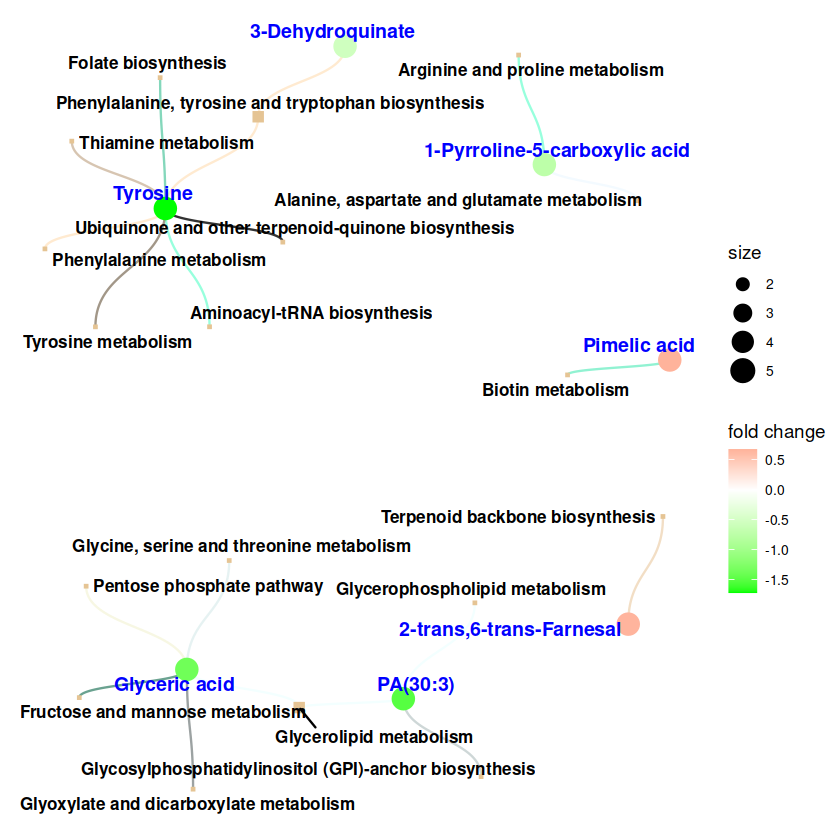

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

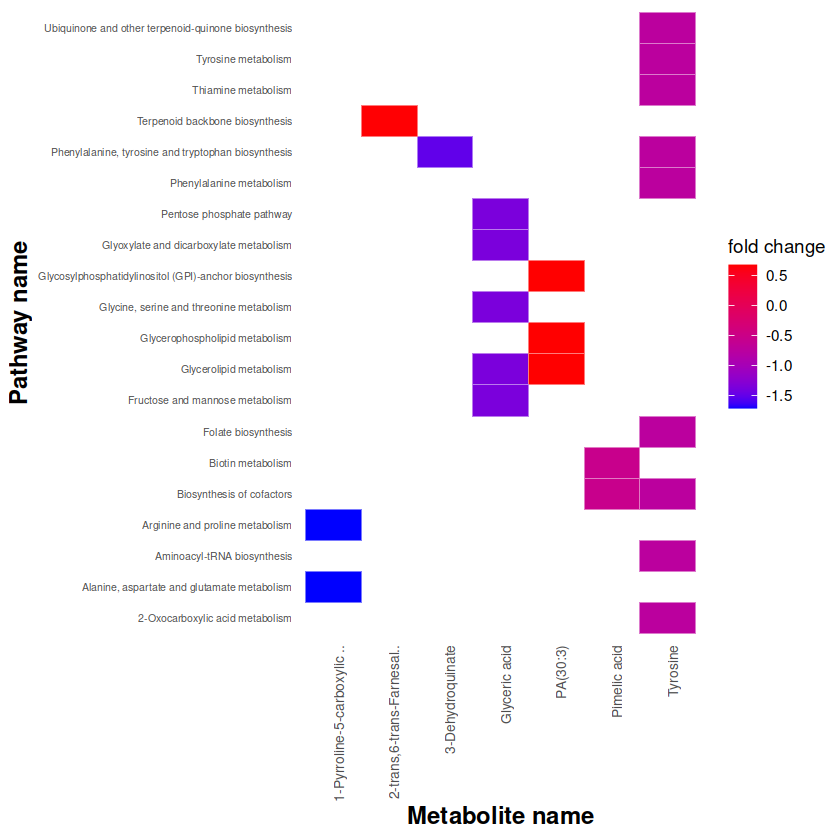

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged.
ℹ Use `.data[["pathway_HG p-value"]]` instead.”


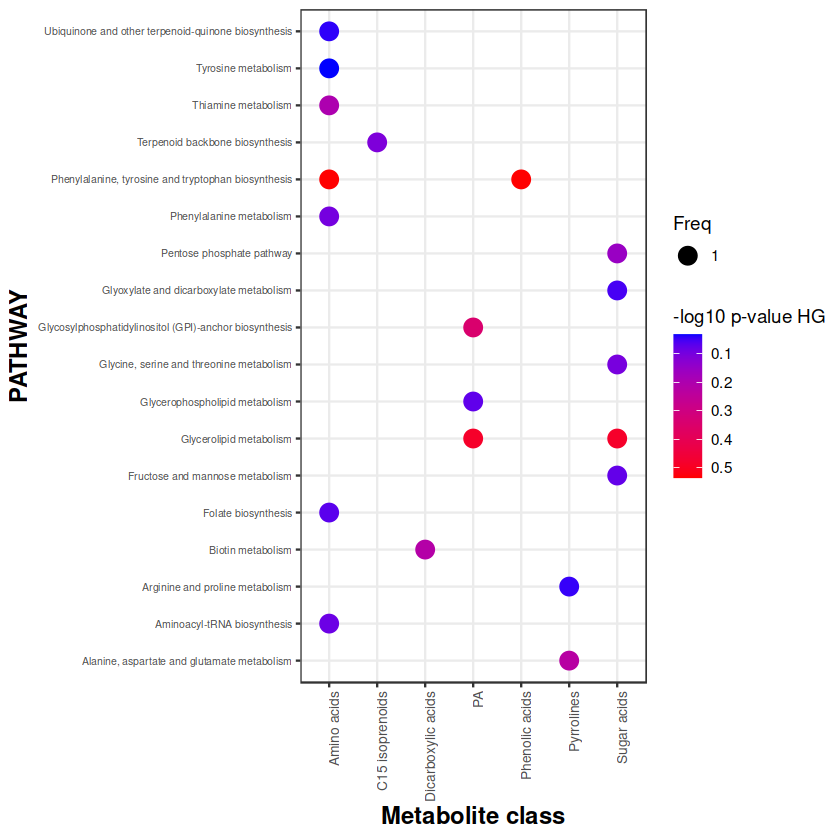

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00049,glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81],9380,(RefSeq)....,Homo sap....,"Glycine,....",NCBI-Gen....,Pfam: 2-....,R01392,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00258 +....,D-Glycer....,1.1.1.79....
2,K00049,glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81],9380,(RefSeq)....,Homo sap....,"Glycine,....",NCBI-Gen....,Pfam: 2-....,R01388,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00258 +....,D-Glycer....,1.1.1.26....
3,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Al....,R08146,"2-trans,6-trans-Farnesal",C03461,C15 isoprenoids,farnesal....,RC00218 ....,C03461 +....,"2-trans,....",1.2.1.3
4,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Al....,R01752,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00577 +....,D-Glycer....,1.2.1.3
5,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Aldedh,R08146,"2-trans,6-trans-Farnesal",C03461,C15 isoprenoids,farnesal....,RC00218 ....,C03461 +....,"2-trans,....",1.2.1.3
6,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Aldedh,R01752,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00577 +....,D-Glycer....,1.2.1.3


#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00049,glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81],9380,(RefSeq)....,Homo sap....,"Glycine,....",NCBI-Gen....,Pfam: 2-....,R01392,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00258 +....,D-Glycer....,1.1.1.79....,Substrate
2,K00049,glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81],9380,(RefSeq)....,Homo sap....,"Glycine,....",NCBI-Gen....,Pfam: 2-....,R01388,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00258 +....,D-Glycer....,1.1.1.26....,Substrate
3,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Al....,R08146,"2-trans,6-trans-Farnesal",C03461,C15 isoprenoids,farnesal....,RC00218 ....,C03461 +....,"2-trans,....",1.2.1.3,Substrate
4,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Al....,R01752,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00577 +....,D-Glycer....,1.2.1.3,Product
5,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Aldedh,R08146,"2-trans,6-trans-Farnesal",C03461,C15 isoprenoids,farnesal....,RC00218 ....,C03461 +....,"2-trans,....",1.2.1.3,Substrate
6,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq)....,Homo sap....,Glycolys....,NCBI-Gen....,Pfam: Aldedh,R01752,Glyceric acid,C00258,Sugar acids,D-glycer....,RC00001 ....,C00577 +....,D-Glycer....,1.2.1.3,Product


#### Get gene info in short form

In [25]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']